In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pickle
df = pd.read_csv("Data file.csv")
df1 = df
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [2]:
df.shape

(209593, 37)

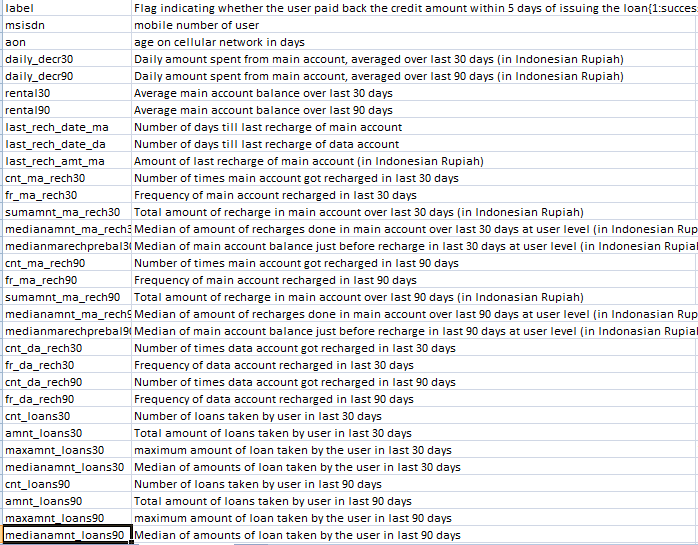

In [3]:
df.drop(["Unnamed: 0", "msisdn", "pdate", "pcircle"], inplace = True, axis = 1)

In [4]:
df[list(df.columns)[0:17]].head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  
0                  7.50              2            21               3078  
1                 61.04              1             0               5787  
2                 66.32              1             0               1539  
3                  0.00              1             0                947  
4                 29.00              8             2              23496

In [5]:
df[list(df.columns)[18:36]].head()

medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  \
0                  7.50            0.0           0.0              0   
1                 61.04            0.0           0.0              0   
2                 66.32            0.0           0.0              0   
3                  2.50            0.0           0.0              0   
4                 35.00            0.0           0.0              0   

   fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0             0            2            12              6.0   
1             0            1            12             12.0   
2             0            1             6              6.0   
3             0            2            12              6.0   
4             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  
0                 0.0  29.000000  29.000000  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   2.333333   2.333333

## EDA

In [6]:
df[list(df.columns)[0:17]].describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209593.000000  209593.000000  209593.000000      209593.000000   
mean        2064.452797       3.978057    3737.355121        7704.501157   
std         2370.786034       4.256090   53643.625172       10139.621714   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368132      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         209593.000000         209593.000000   209593.00000   
mean            1812.817952           3851.927942        6.31543   
std             2070.864620          54006.374433        7.19347   
min                0.000000           -200.000000        0.00000   
25%              770.000000             11.000000        2.00000   
50%             1539.000000             33.900000        4.00000   
75%             1924.000000             83.000000        8.00000   
max            55000.000000         999479.419319      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  
count  209593.000000      209593.000000  
mean        7.716780       12396.218352  
std        12.590251       16857.793882  
min         0.000000           0.000000  
25%         0.000000        2317.000000  
50%         2.000000        7226.000000  
75%         8.000000       16000.000000  
max        88.000000      953036.000000

In [7]:
df[list(df.columns)[18:36]].describe()

medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  209593.000000  209593.000000  209593.000000    209593.000000   
mean        0.045712       2.758981      17.952021       274.658747   
std         0.951386       2.554502      17.379741      4245.264648   
min         0.000000       0.000000       0.000000         0.000000   
25%         0.000000       1.000000       6.000000         6.000000   
50%         0.000000       2.000000      12.000000         6.000000   
75%         0.000000       4.000000      24.000000         6.000000   
max        64.000000      50.000000     306.000000     99864.560864   

       medianamnt_loans30    cnt_loans90   amnt_loans90  maxamnt_loans90  \
count       209593.000000  209593.000000  209593.000000    209593.000000   
mean             0.054029      18.520919      23.645398         6.703134   
std              0.218039     224.797423      26.469861         2.103864   
min              0.000000       0.000000       0.000000         0.000000   
25%              0.000000       1.000000       6.000000         6.000000   
50%              0.000000       2.000000      12.000000         6.000000   
75%              0.000000       5.000000      30.000000         6.000000   
max              3.000000    4997.517944     438.000000        12.000000   

       medianamnt_loans90      payback30      payback90  
count       209593.000000  209593.000000  209593.000000  
mean             0.046077       3.398826       4.321485  
std              0.200692       8.813729      10.308108  
min              0.000000       0.000000       0.000000  
25%              0.000000       0.000000       0.000000  
50%              0.000000       0.000000       1.666667  
75%              0.000000       3.750000       4.500000  
max              3.000000     171.500000     171.500000

Just by inspecting the output of describe funciton, we can analyze that there are so many outliers present in the data which can affect machine learning model drastically. For example, the maximum value of "aon" column is 999860.755168 but 75% is 982.

In [8]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

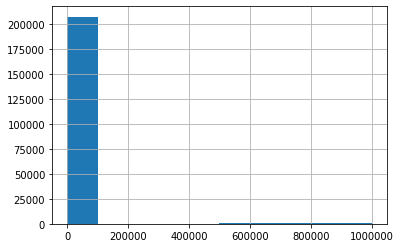

In [9]:
df["aon"].hist()

Just by looking the distribution of the data, outliers are clearly visible. With a little bit inspection or exploring the data, it is found that values above 2500 can be considered as outliers and should be removed.

Text(0.5, 1.0, 'aon')

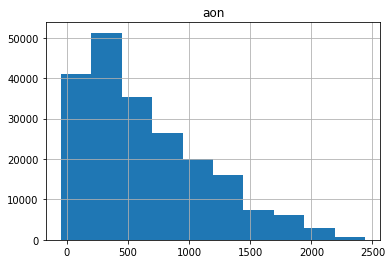

In [10]:
df = df[df["aon"]<2500]
df["aon"].hist()
plt.title("aon")

In [11]:
df.shape

(207504, 33)

Text(0, 0.5, 'count')

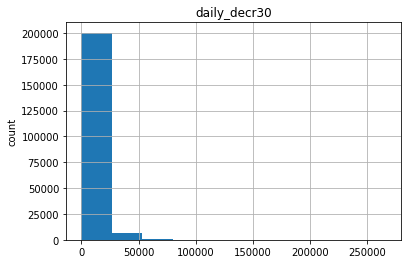

In [12]:
df["daily_decr30"].hist()
plt.title("daily_decr30")
plt.ylabel("count")

By inspection, it is found that the instances count of values above 60000 is very low and can be considered as outlier. This similar analysis should done for all of the features.

(207504, 33)
(205145, 33)


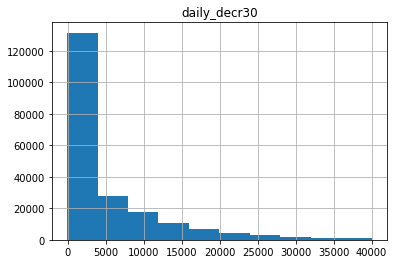

In [13]:
print(df.shape)
df = df[df["daily_decr30"]<40000]
df["daily_decr30"].hist()
plt.title("daily_decr30")
print(df.shape)

Text(0, 0.5, 'count')

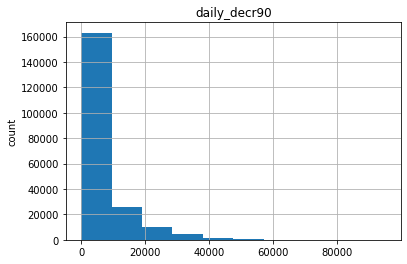

In [14]:
df["daily_decr90"].hist()
plt.title("daily_decr90")
plt.ylabel("count")

(205145, 33)
(204782, 33)


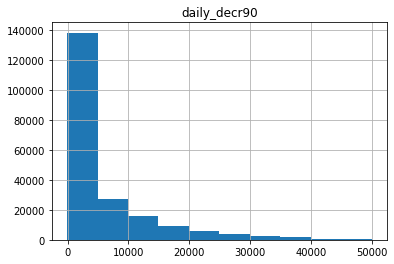

In [15]:
print(df.shape)
df = df[df["daily_decr90"]<50000]
df["daily_decr90"].hist()
plt.title("daily_decr90")
print(df.shape)

Text(0, 0.5, 'count')

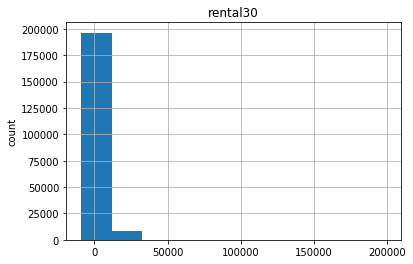

In [16]:
df["rental30"].hist()
plt.title("rental30")
plt.ylabel("count")

(204782, 33)
(204047, 33)


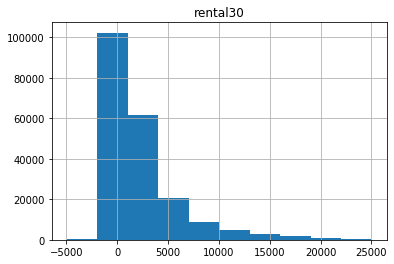

In [17]:
print(df.shape)
df = df[df["rental30"]<25000]
df = df[df["rental30"]>-5000]
df["rental30"].hist()
plt.title("rental30")
print(df.shape)

Text(0, 0.5, 'count')

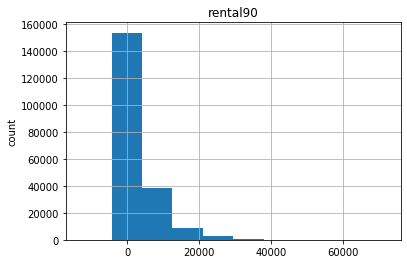

In [18]:
df["rental90"].hist()
plt.title("rental90")
plt.ylabel("count")

(204047, 33)
(203458, 33)


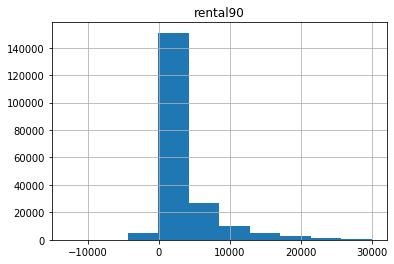

In [19]:
print(df.shape)
df = df[df["rental90"]<30000]
df["rental90"].hist()
plt.title("rental90")
print(df.shape)

Text(0, 0.5, 'count')

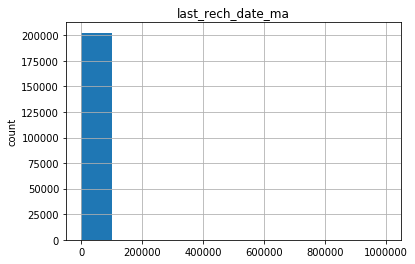

In [20]:
df["last_rech_date_ma"].hist()
plt.title("last_rech_date_ma")
plt.ylabel("count")

(203458, 33)
(202010, 33)


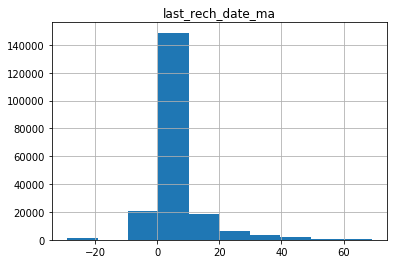

In [21]:
print(df.shape)
df = df[df["last_rech_date_ma"]<70]
#df = df[df["last_rech_date_ma"]>0]
df["last_rech_date_ma"].hist()
plt.title("last_rech_date_ma")
print(df.shape)

Text(0, 0.5, 'count')

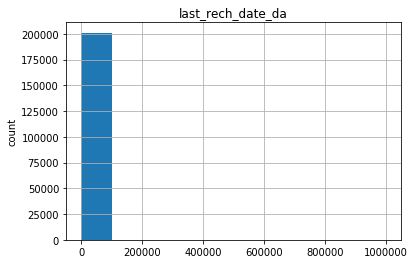

In [22]:
df["last_rech_date_da"].hist()
plt.title("last_rech_date_da")
plt.ylabel("count")

(202010, 33)
(200121, 33)


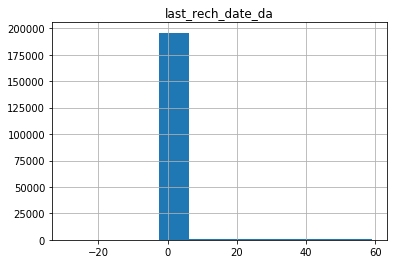

In [23]:
print(df.shape)
df = df[df["last_rech_date_da"]<60]
#df = df[df["last_rech_date_da"]>0]
df["last_rech_date_da"].hist()
plt.title("last_rech_date_da")
print(df.shape)

Text(0, 0.5, 'count')

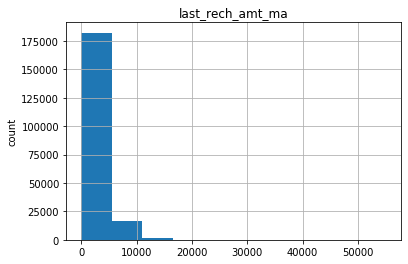

In [24]:
df["last_rech_amt_ma"].hist()
plt.title("last_rech_amt_ma")
plt.ylabel("count")

(200121, 33)
(199919, 33)


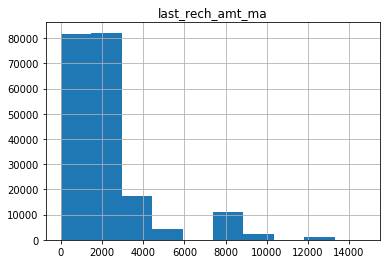

In [25]:
print(df.shape)
df = df[df["last_rech_amt_ma"]<15000]
df["last_rech_amt_ma"].hist()
plt.title("last_rech_amt_ma")
print(df.shape)

Text(0, 0.5, 'count')

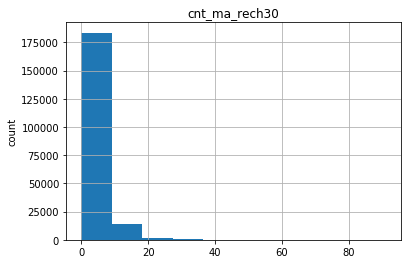

In [26]:
df["cnt_ma_rech30"].hist()
plt.title("cnt_ma_rech30")
plt.ylabel("count")

(199919, 33)
(199672, 33)


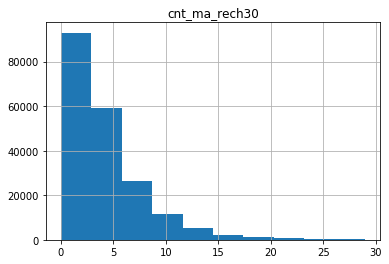

In [27]:
print(df.shape)
df = df[df["cnt_ma_rech30"]<30]
df["cnt_ma_rech30"].hist()
plt.title("cnt_ma_rech30")
print(df.shape)

Text(0, 0.5, 'count')

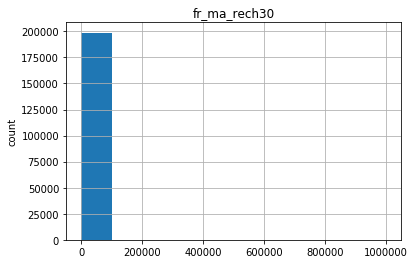

In [28]:
df["fr_ma_rech30"].hist()
plt.title("fr_ma_rech30")
plt.ylabel("count")

(199672, 33)
(198666, 33)


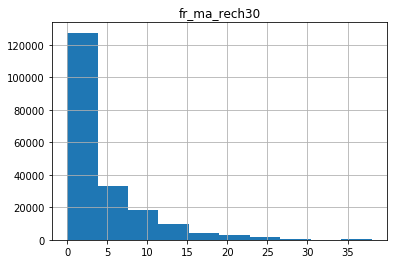

In [29]:
print(df.shape)
# filtering the outliers
df = df[df["fr_ma_rech30"]<40]
df["fr_ma_rech30"].hist()
plt.title("fr_ma_rech30")
print(df.shape)

Text(0, 0.5, 'count')

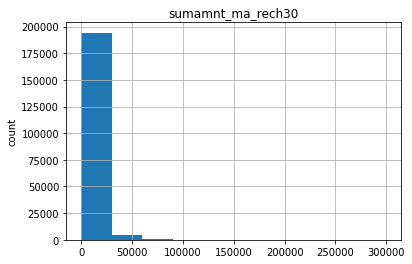

In [30]:
df["sumamnt_ma_rech30"].hist()
plt.title("sumamnt_ma_rech30")
plt.ylabel("count")

(198666, 33)
(197994, 33)


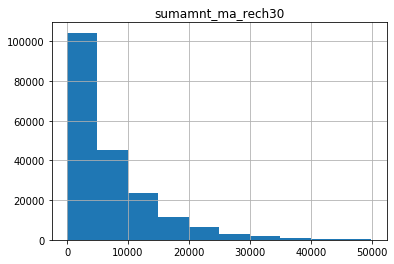

In [31]:
print(df.shape)
# filtering the outliers
df = df[df["sumamnt_ma_rech30"]<50000]
df["sumamnt_ma_rech30"].hist()
plt.title("sumamnt_ma_rech30")
print(df.shape)

Text(0, 0.5, 'count')

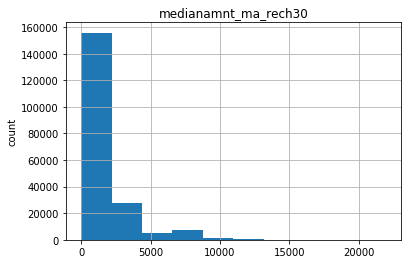

In [32]:
df["medianamnt_ma_rech30"].hist()
plt.title("medianamnt_ma_rech30")
plt.ylabel("count")

(197994, 33)
(197987, 33)


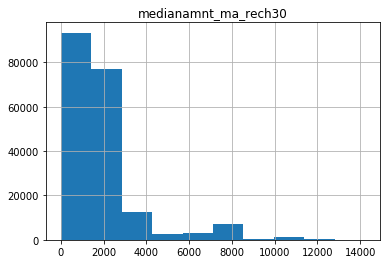

In [33]:
print(df.shape)
# filtering the outliers
df = df[df["medianamnt_ma_rech30"]<15000]
df["medianamnt_ma_rech30"].hist()
plt.title("medianamnt_ma_rech30")
print(df.shape)

Text(0, 0.5, 'count')

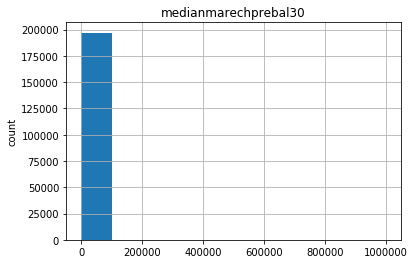

In [34]:
df["medianmarechprebal30"].hist()
plt.title("medianmarechprebal30")
plt.ylabel("count")

(197987, 33)
(195572, 33)


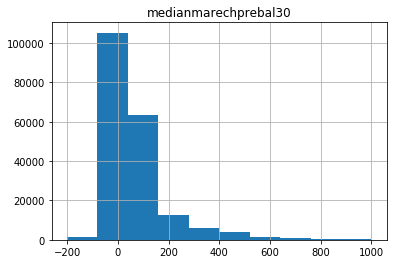

In [35]:
print(df.shape)
# filtering the outliers
df = df[df["medianmarechprebal30"]<1000]
df["medianmarechprebal30"].hist()
plt.title("medianmarechprebal30")
print(df.shape)

Text(0, 0.5, 'count')

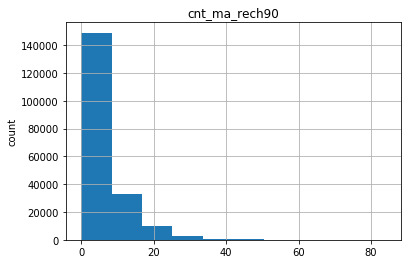

In [36]:
df["cnt_ma_rech90"].hist()
plt.title("cnt_ma_rech90")
plt.ylabel("count")

(195572, 33)
(195077, 33)


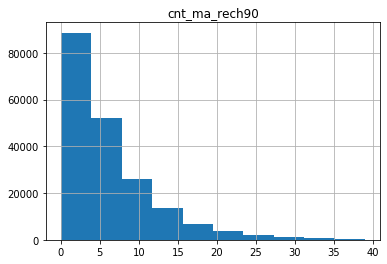

In [37]:
print(df.shape)
# filtering the outliers
df = df[df["cnt_ma_rech90"]<40]
df["cnt_ma_rech90"].hist()
plt.title("cnt_ma_rech90")
print(df.shape)

Text(0, 0.5, 'count')

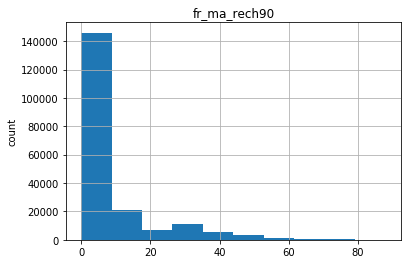

In [38]:
df["fr_ma_rech90"].hist()
plt.title("fr_ma_rech90")
plt.ylabel("count")

(195077, 33)
(195019, 33)


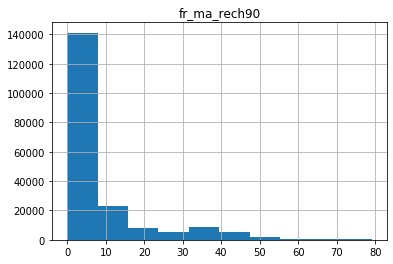

In [39]:
print(df.shape)
# filtering the outliers
df = df[df["fr_ma_rech90"]<80]
df["fr_ma_rech90"].hist()
plt.title("fr_ma_rech90")
print(df.shape)

Text(0, 0.5, 'count')

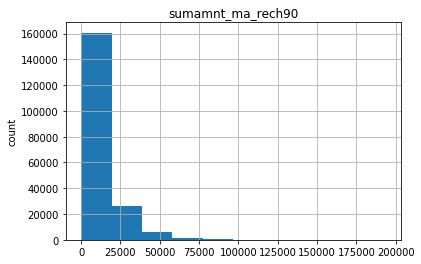

In [40]:
df["sumamnt_ma_rech90"].hist()
plt.title("sumamnt_ma_rech90")
plt.ylabel("count")

(195019, 33)
(194395, 33)


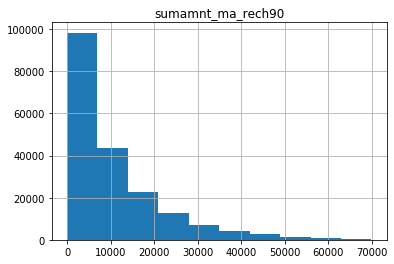

In [41]:
print(df.shape)
# filtering the outliers
df = df[df["sumamnt_ma_rech90"]<70000]
df["sumamnt_ma_rech90"].hist()
plt.title("sumamnt_ma_rech90")
print(df.shape)

Text(0, 0.5, 'count')

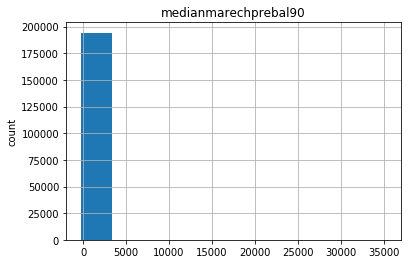

In [42]:
df["medianmarechprebal90"].hist()
plt.title("medianmarechprebal90")
plt.ylabel("count")

(194395, 33)
(193698, 33)


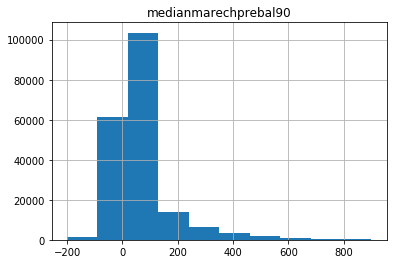

In [43]:
print(df.shape)
# filtering the outliers
df = df[df["medianmarechprebal90"]<900]
df["medianmarechprebal90"].hist()
plt.title("medianmarechprebal90")
print(df.shape)

Text(0, 0.5, 'count')

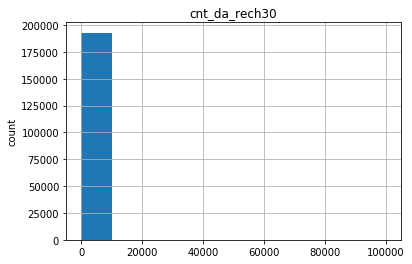

In [44]:
df["cnt_da_rech30"].hist()
plt.title("cnt_da_rech30")
plt.ylabel("count")

(193698, 33)
(192651, 33)


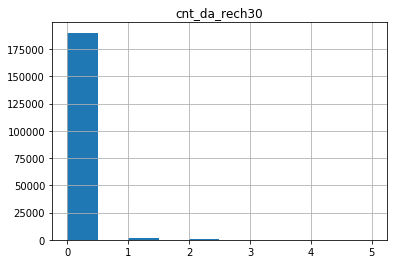

In [45]:
print(df.shape)
# filtering the outliers
df = df[df["cnt_da_rech30"]<6]
df["cnt_da_rech30"].hist()
plt.title("cnt_da_rech30")
print(df.shape)

Text(0, 0.5, 'count')

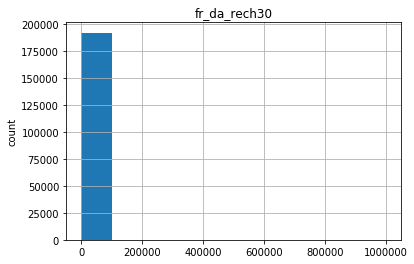

In [46]:
df["fr_da_rech30"].hist()
plt.title("fr_da_rech30")
plt.ylabel("count")

(192651, 33)
(191554, 33)


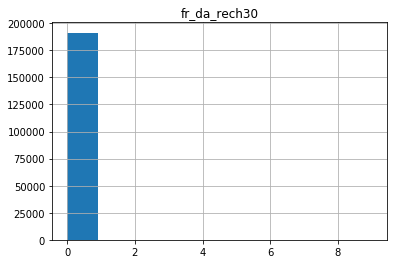

In [47]:
print(df.shape)
# filtering the outliers
df = df[df["fr_da_rech30"]<10]
df["fr_da_rech30"].hist()
plt.title("fr_da_rech30")
print(df.shape)

Text(0, 0.5, 'count')

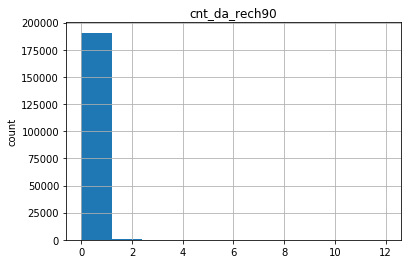

In [48]:
df["cnt_da_rech90"].hist()
plt.title("cnt_da_rech90")
plt.ylabel("count")

(191554, 33)
(191554, 33)


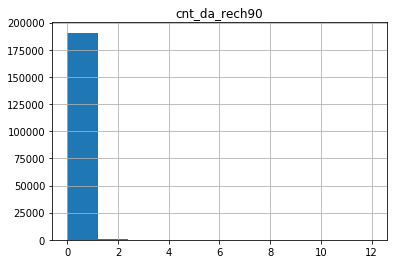

In [49]:
print(df.shape)
# filtering the outliers
df = df[df["cnt_da_rech90"]<15]
df["cnt_da_rech90"].hist()
plt.title("cnt_da_rech90")
print(df.shape)

Text(0, 0.5, 'count')

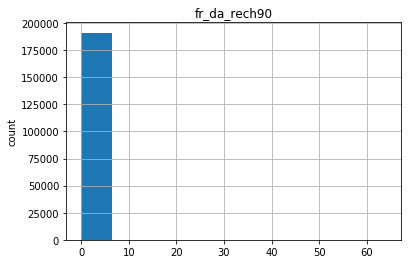

In [50]:
df["fr_da_rech90"].hist()
plt.title("fr_da_rech90")
plt.ylabel("count")

(191554, 33)
(191540, 33)


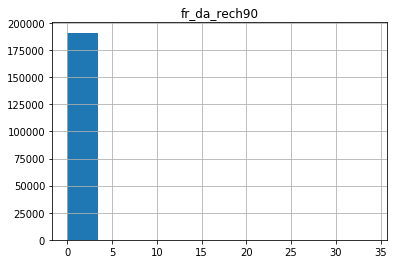

In [51]:
print(df.shape)
# filtering the outliers
df = df[df["fr_da_rech90"]<35]
df["fr_da_rech90"].hist()
plt.title("fr_da_rech90")
print(df.shape)

Text(0, 0.5, 'count')

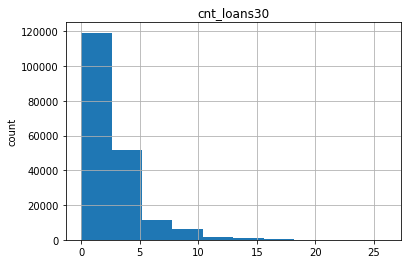

In [52]:
df["cnt_loans30"].hist()
plt.title("cnt_loans30")
plt.ylabel("count")

(191540, 33)
(191537, 33)


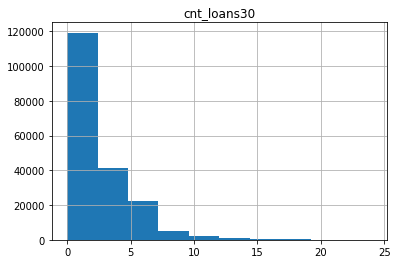

In [53]:
print(df.shape)
# filtering the outliers
df = df[df["cnt_loans30"]<25]
df["cnt_loans30"].hist()
plt.title("cnt_loans30")
print(df.shape)

Text(0, 0.5, 'count')

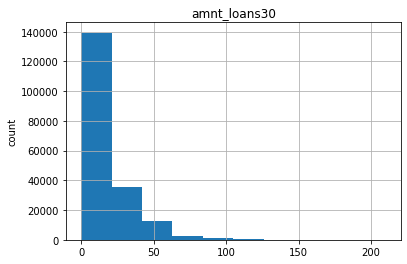

In [54]:
df["amnt_loans30"].hist()
plt.title("amnt_loans30")
plt.ylabel("count")

(191537, 33)
(191449, 33)


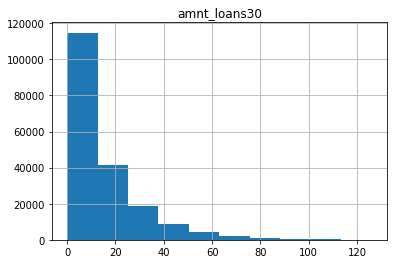

In [55]:
print(df.shape)
# filtering the outliers
df = df[df["amnt_loans30"]<130]
df["amnt_loans30"].hist()
plt.title("amnt_loans30")
print(df.shape)

Text(0, 0.5, 'count')

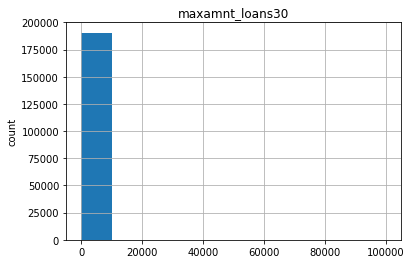

In [56]:
df["maxamnt_loans30"].hist()
plt.title("maxamnt_loans30")
plt.ylabel("count")

(191449, 33)
(190495, 33)


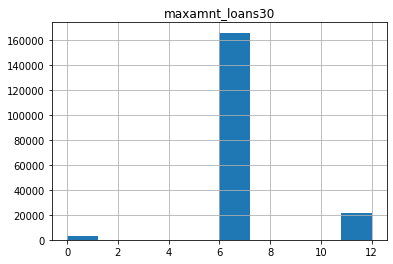

In [57]:
print(df.shape)
# filtering the outliers
df = df[df["maxamnt_loans30"]<2000]
df["maxamnt_loans30"].hist()
plt.title("maxamnt_loans30")
print(df.shape)

Text(0, 0.5, 'count')

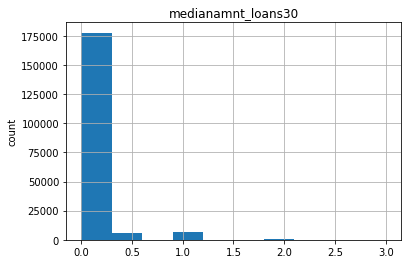

In [58]:
df["medianamnt_loans30"].hist()
plt.title("medianamnt_loans30")
plt.ylabel("count")

Text(0, 0.5, 'count')

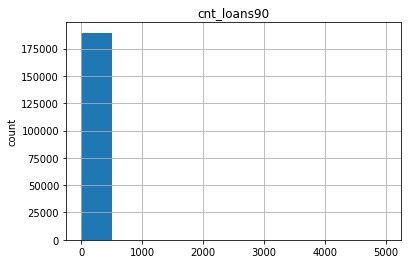

In [59]:
df["cnt_loans90"].hist()
plt.title("cnt_loans90")
plt.ylabel("count")

(190495, 33)
(188424, 33)


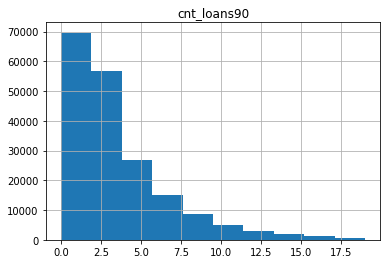

In [60]:
print(df.shape)
# filtering the outliers
df = df[df["cnt_loans90"]<20]
df["cnt_loans90"].hist()
plt.title("cnt_loans90")
print(df.shape)

Text(0, 0.5, 'count')

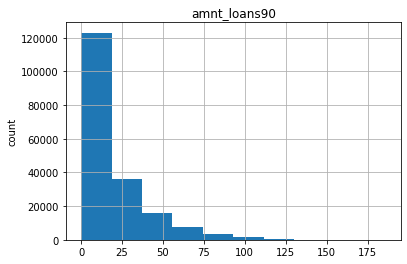

In [61]:
df["amnt_loans90"].hist()
plt.title("amnt_loans90")
plt.ylabel("count")

(188424, 33)
(188424, 33)


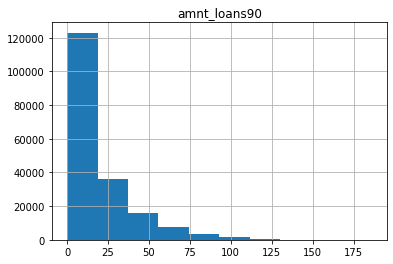

In [62]:
print(df.shape)
# filtering the outliers
df = df[df["amnt_loans90"]<200]
df["amnt_loans90"].hist()
plt.title("amnt_loans90")
print(df.shape)

Text(0, 0.5, 'count')

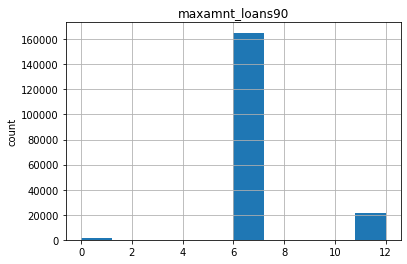

In [63]:
df["maxamnt_loans90"].hist()
plt.title("maxamnt_loans90")
plt.ylabel("count")

Text(0, 0.5, 'count')

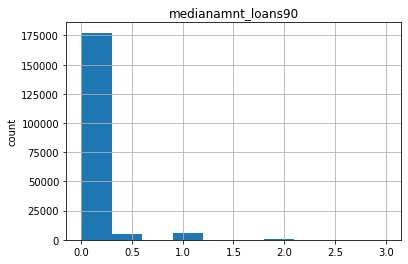

In [64]:
df["medianamnt_loans90"].hist()
plt.title("medianamnt_loans90")
plt.ylabel("count")

Text(0, 0.5, 'count')

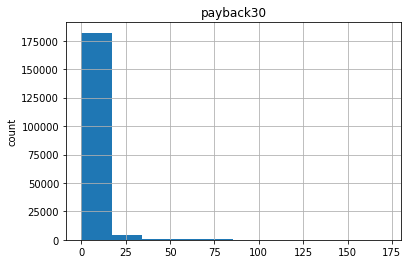

In [65]:
df["payback30"].hist()
plt.title("payback30")
plt.ylabel("count")

(188424, 33)
(188094, 33)


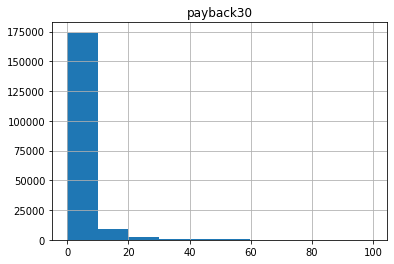

In [66]:
print(df.shape)
# filtering the outliers
df = df[df["payback30"]<100]
df["payback30"].hist()
plt.title("payback30")
print(df.shape)

Text(0, 0.5, 'count')

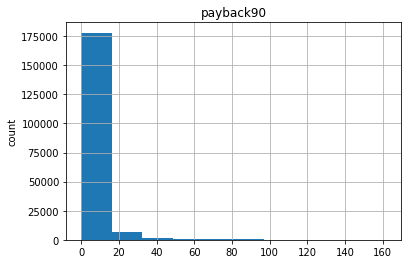

In [67]:
df["payback90"].hist()
plt.title("payback90")
plt.ylabel("count")

(188094, 33)
(187038, 33)


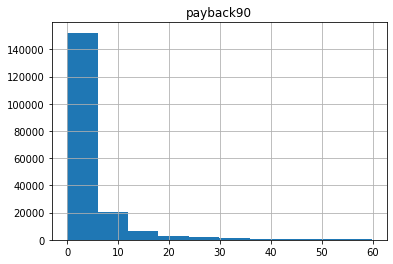

In [68]:
print(df.shape)
# filtering the outliers
df = df[df["payback90"]<60]
df["payback90"].hist()
plt.title("payback90")
print(df.shape)

Text(0, 0.5, 'count')

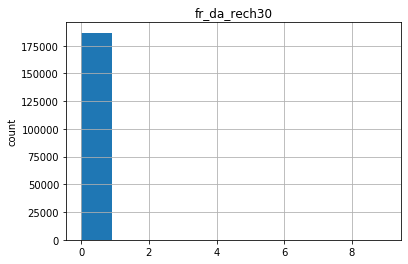

In [69]:
df["fr_da_rech30"].hist()
plt.title("fr_da_rech30")
plt.ylabel("count")

In [70]:
df.shape

(187038, 33)

(187038, 33)


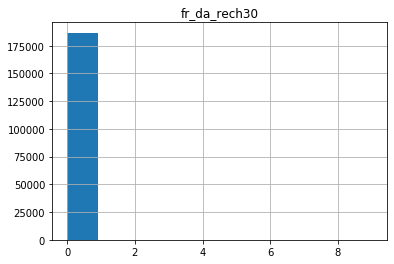

In [71]:
df = df[df["fr_da_rech30"]<25]
df["fr_da_rech30"].hist()
plt.title("fr_da_rech30")
print(df.shape)

In [72]:
feat = list(df.columns)
cat_feat = []
num_feat = []
for feat in feat:
    if feat == "label":
        pass
    elif df[feat].dtypes == "object":
        cat_feat.append(feat)
    else:
        num_feat.append(feat)

C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figu

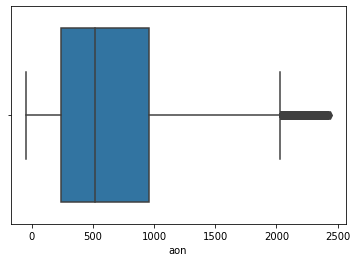

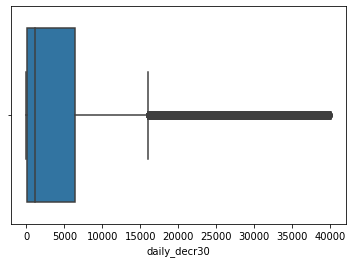

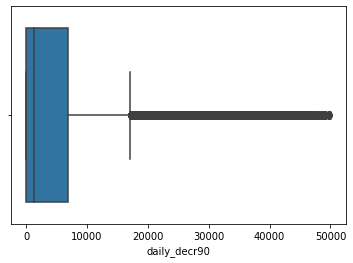

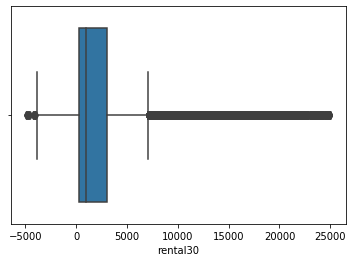

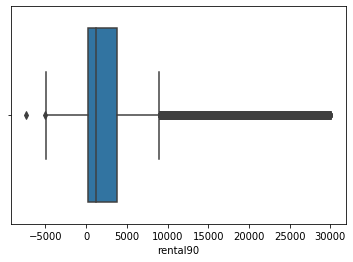

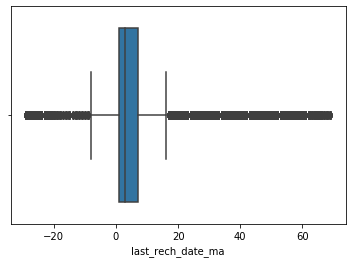

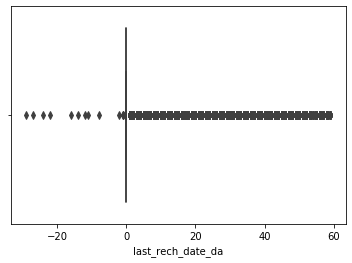

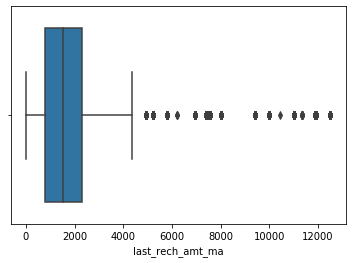

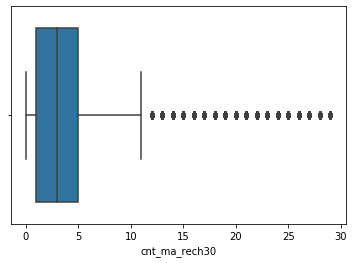

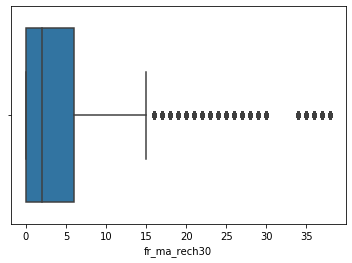

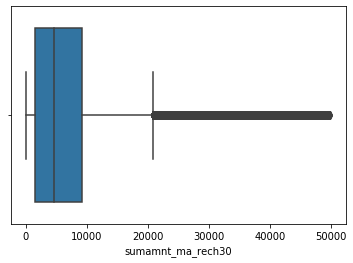

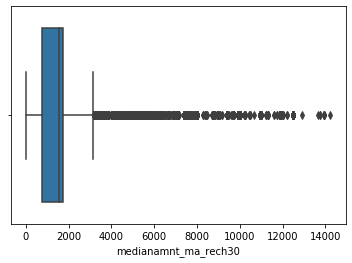

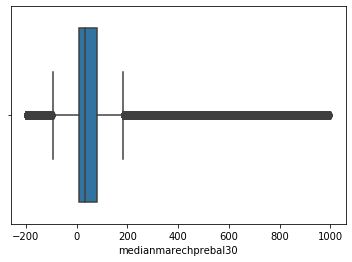

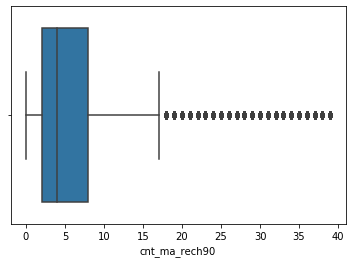

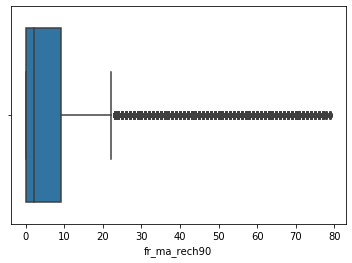

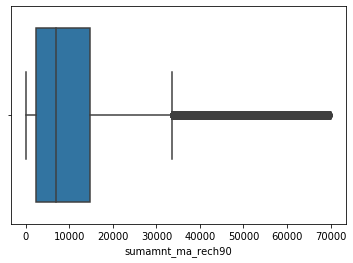

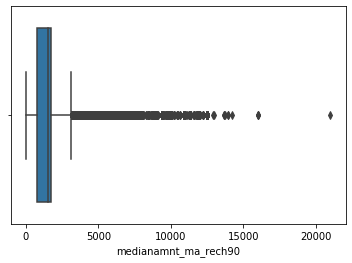

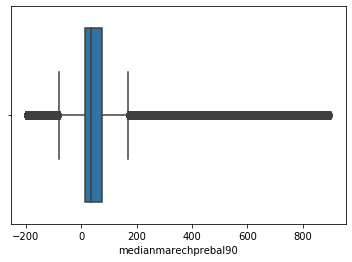

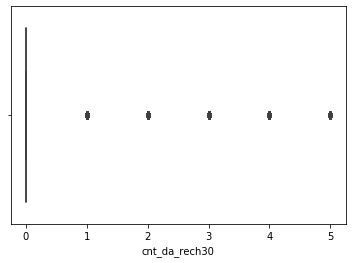

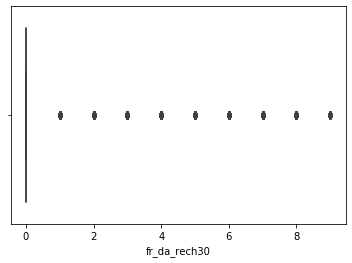

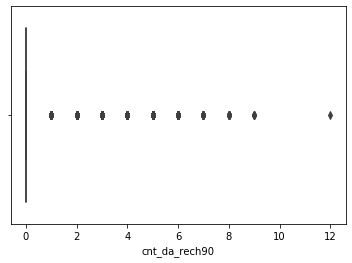

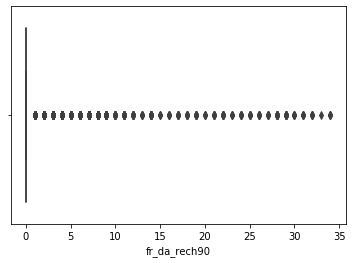

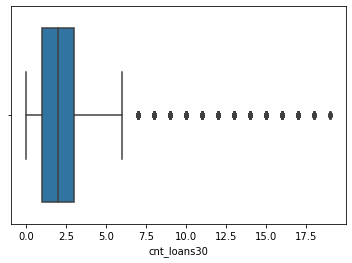

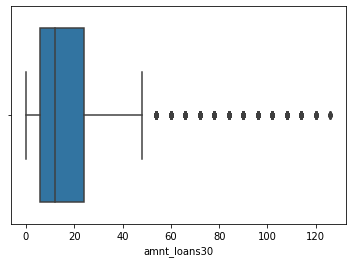

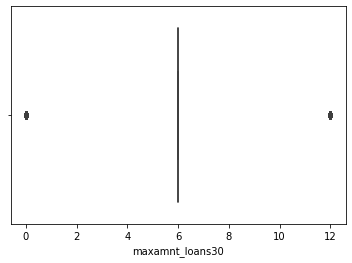

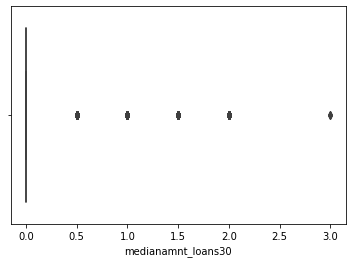

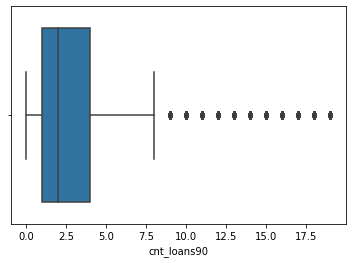

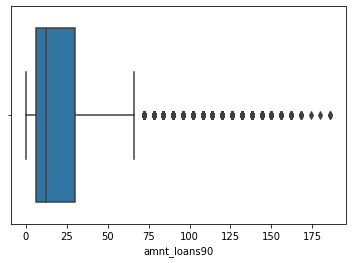

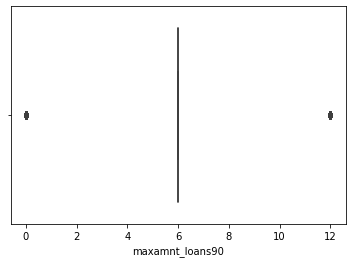

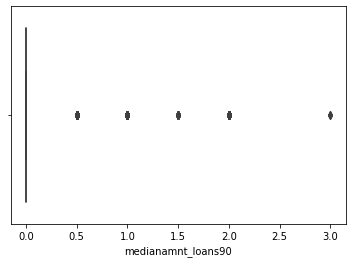

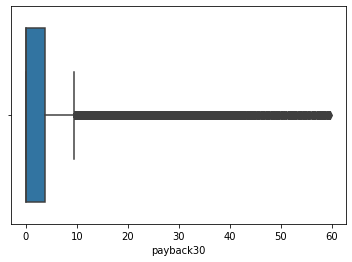

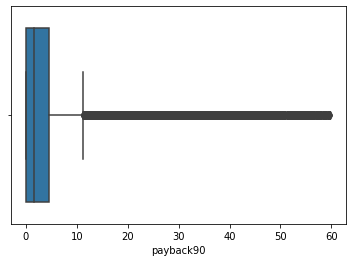

In [74]:
for i in num_feat:
    plt.figure()
    sns.boxplot(x=df[i])

In [75]:
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  187038.000000  187038.000000  187038.000000  187038.000000   
mean        0.871556     651.528256    4388.069175    4883.470771   
std         0.334585     498.350121    6572.427812    7583.817470   
min         0.000000     -48.000000     -46.215000     -46.215000   
25%         1.000000     241.000000      38.493417      38.697000   
50%         1.000000     516.000000    1200.000000    1221.000000   
75%         1.000000     958.000000    6417.966500    6857.715000   
max         1.000000    2440.000000   39983.972667   49977.500000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  187038.000000  187038.000000      187038.000000      187038.000000   
mean     2353.288733    3006.046365           5.818000           0.552743   
std      3425.038915    4496.118375           8.995323           4.357053   
min     -4934.600000   -7395.200000         -29.000000         -29.000000   
25%       258.240000     287.327500           1.000000           0.000000   
50%       999.660000    1221.785000           3.000000           0.000000   
75%      2994.172500    3778.087500           7.000000           0.000000   
max     24998.700000   29992.440000          69.000000          59.000000   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count     187038.000000  187038.000000  ...  187038.000000  187038.000000   
mean        1947.518531       3.700649  ...       2.626985      16.878356   
std         2107.596445       3.592133  ...       2.211538      14.577345   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         2309.000000       5.000000  ...       3.000000      24.000000   
max        12500.000000      29.000000  ...      19.000000     126.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90  amnt_loans90  \
count    187038.000000       187038.000000  187038.000000  187038.00000   
mean          6.587720            0.053845       3.409762      21.63077   
std           2.056114            0.217429       3.243766      20.99346   
min           0.000000            0.000000       0.000000       0.00000   
25%           6.000000            0.000000       1.000000       6.00000   
50%           6.000000            0.000000       2.000000      12.00000   
75%           6.000000            0.000000       4.000000      30.00000   
max          12.000000            3.000000      19.000000     186.00000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    187038.000000       187038.000000  187038.000000  187038.000000  
mean          6.630931            0.046162       2.996724       3.735967  
std           2.007489            0.200813       5.803457       6.796288  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.555556  
75%           6.000000            0.000000       3.800000       4.500000  
max          12.000000            3.000000      59.666667      59.800000  

[8 rows x 33 columns]

In [76]:
df1.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count     209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        2064.452797       3.978057  ...       2.758981      17.952021   
std         2370.786034       4.256090  ...       2.554502      17.379741   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         2309.000000       5.000000  ...       4.000000      24.000000   
max        55000.000000     203.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 33 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F05C0B6E48>,
      dtype=object)

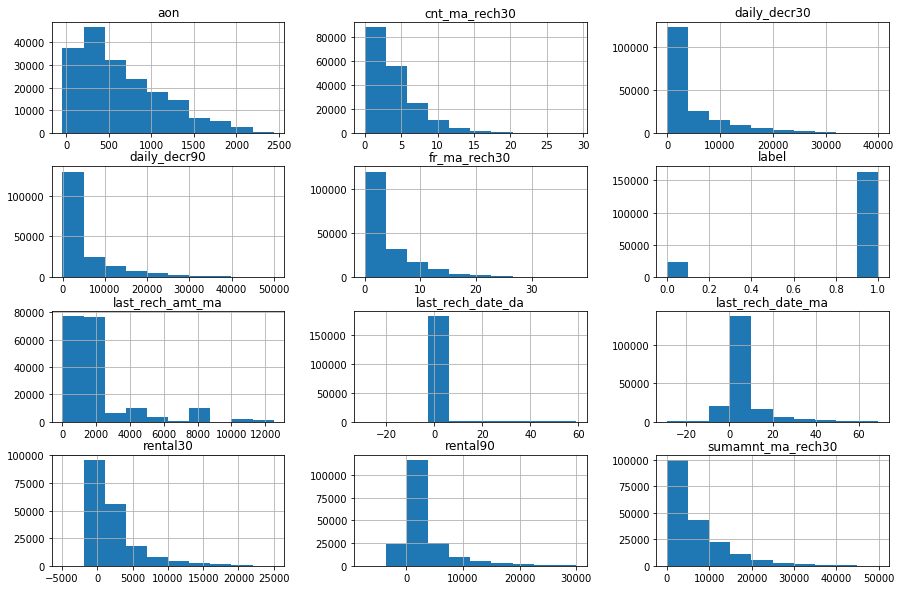

In [77]:
feat = list(df.columns)
df[feat[:12]].hist(figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F05D959588>,
      dtype=object)

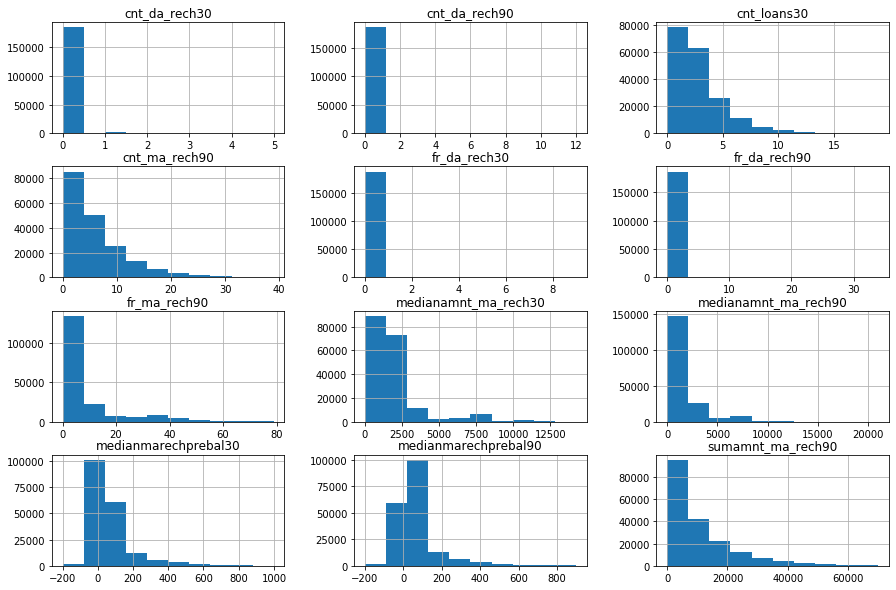

In [78]:
df[feat[12:24]].hist(figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F05C16EB38>,
      dtype=object)

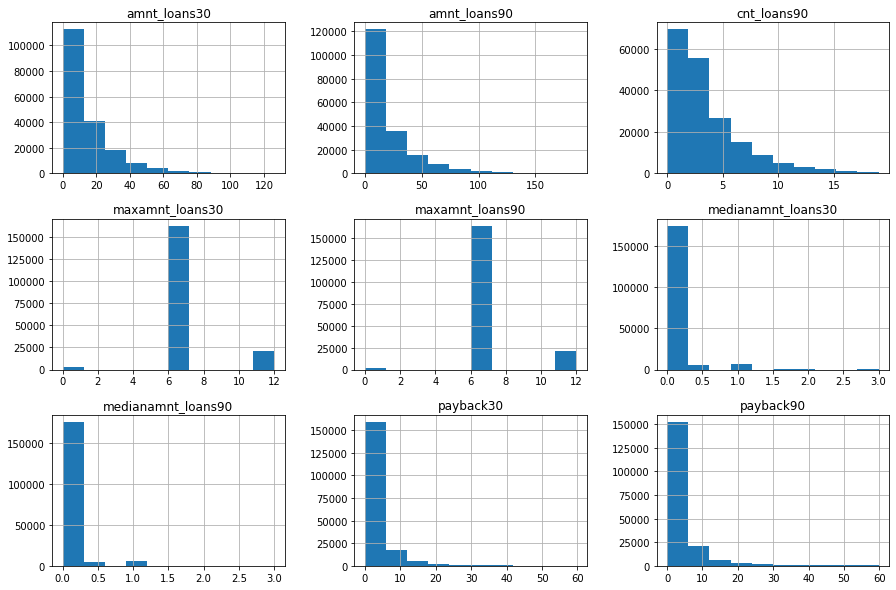

In [79]:
df[feat[24:36]].hist(figsize=(15,10))

In [80]:
heat = df.corr()

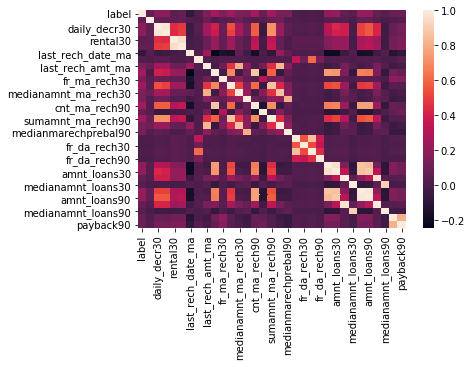

In [81]:
sns.heatmap(heat)

In [82]:
cols = list(heat.columns)
heat[heat[cols]>0.8]

label  aon  daily_decr30  daily_decr90  rental30  \
label                   1.0  NaN           NaN           NaN       NaN   
aon                     NaN  1.0           NaN           NaN       NaN   
daily_decr30            NaN  NaN      1.000000      0.977643       NaN   
daily_decr90            NaN  NaN      0.977643      1.000000       NaN   
rental30                NaN  NaN           NaN           NaN  1.000000   
rental90                NaN  NaN           NaN           NaN  0.952162   
last_rech_date_ma       NaN  NaN           NaN           NaN       NaN   
last_rech_date_da       NaN  NaN           NaN           NaN       NaN   
last_rech_amt_ma        NaN  NaN           NaN           NaN       NaN   
cnt_ma_rech30           NaN  NaN           NaN           NaN       NaN   
fr_ma_rech30            NaN  NaN           NaN           NaN       NaN   
sumamnt_ma_rech30       NaN  NaN           NaN           NaN       NaN   
medianamnt_ma_rech30    NaN  NaN           NaN           NaN       NaN   
medianmarechprebal30    NaN  NaN           NaN           NaN       NaN   
cnt_ma_rech90           NaN  NaN           NaN           NaN       NaN   
fr_ma_rech90            NaN  NaN           NaN           NaN       NaN   
sumamnt_ma_rech90       NaN  NaN           NaN           NaN       NaN   
medianamnt_ma_rech90    NaN  NaN           NaN           NaN       NaN   
medianmarechprebal90    NaN  NaN           NaN           NaN       NaN   
cnt_da_rech30           NaN  NaN           NaN           NaN       NaN   
fr_da_rech30            NaN  NaN           NaN           NaN       NaN   
cnt_da_rech90           NaN  NaN           NaN           NaN       NaN   
fr_da_rech90            NaN  NaN           NaN           NaN       NaN   
cnt_loans30             NaN  NaN           NaN           NaN       NaN   
amnt_loans30            NaN  NaN           NaN           NaN       NaN   
maxamnt_loans30         NaN  NaN           NaN           NaN       NaN   
medianamnt_loans30      NaN  NaN           NaN           NaN       NaN   
cnt_loans90             NaN  NaN           NaN           NaN       NaN   
amnt_loans90            NaN  NaN           NaN           NaN       NaN   
maxamnt_loans90         NaN  NaN           NaN           NaN       NaN   
medianamnt_loans90      NaN  NaN           NaN           NaN       NaN   
payback30               NaN  NaN           NaN           NaN       NaN   
payback90               NaN  NaN           NaN           NaN       NaN   

                      rental90  last_rech_date_ma  last_rech_date_da  \
label                      NaN                NaN                NaN   
aon                        NaN                NaN                NaN   
daily_decr30               NaN                NaN                NaN   
daily_decr90               NaN                NaN                NaN   
rental30              0.952162                NaN                NaN   
rental90              1.000000                NaN                NaN   
last_rech_date_ma          NaN                1.0                NaN   
last_rech_date_da          NaN                NaN                1.0   
last_rech_amt_ma           NaN                NaN                NaN   
cnt_ma_rech30              NaN                NaN                NaN   
fr_ma_rech30               NaN                NaN                NaN   
sumamnt_ma_rech30          NaN                NaN                NaN   
medianamnt_ma_rech30       NaN                NaN                NaN   
medianmarechprebal30       NaN                NaN                NaN   
cnt_ma_rech90              NaN                NaN                NaN   
fr_ma_rech90               NaN                NaN                NaN   
sumamnt_ma_rech90          NaN                NaN                NaN   
medianamnt_ma_rech90       NaN                NaN                NaN   
medianmarechprebal90       NaN                NaN                NaN   
cnt_da_rech30              NaN                NaN                

Since there are some features which are strongly correlated to each other. We can remove those features.

In [83]:
df.drop(["daily_decr90", "rental90", "last_rech_amt_ma", "cnt_ma_rech30", "cnt_loans30", "medianamnt_loans30", 
         "amnt_loans90", "payback90"], axis = 1, inplace = True)

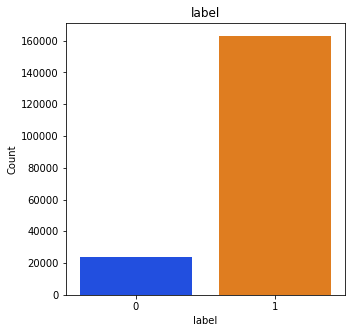

In [84]:
label = df['label'].value_counts()

plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(label.index, label.values, palette='bright')
plt.title('label')
plt.xlabel('label')
plt.style.use('bmh')
plt.ylabel('Count')
plt.tick_params(labelsize=10)
plt.show()

We have observed that there is a class imbalance for two categories for target variable. We have to balance these categories so that machine learning algorithm can perform well on the data.

In [85]:
df.label.value_counts()

1    163014
0     24024
Name: label, dtype: int64

In [86]:
163693-24140

139553

In [87]:
df1 = df[df["label"]==1]
df2 = df[df["label"]==0]

In [88]:
from sklearn.utils import shuffle
df1 = shuffle(df1)
df1.reset_index(drop=True, inplace=True)
df1 = df1.truncate(before=0, after=24023)
df1.head()

label    aon  daily_decr30  rental30  last_rech_date_ma  last_rech_date_da  \
0      1  339.0   9411.363333   4152.83                1.0                0.0   
1      1  562.0     20.365000    151.20                1.0                0.0   
2      1  664.0     24.966667    627.97               32.0               28.0   
3      1  654.0   5645.030000   1858.67                1.0                0.0   
4      1  235.0   5596.000000   3591.43               15.0                0.0   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0           9.0            10004.0                1539.0   
1           9.0            12067.0                6033.5   
2           0.0                0.0                   0.0   
3           5.0             6166.0                 770.0   
4           0.0             1539.0                1539.0   

   medianmarechprebal30  ...  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  \
0                  23.5  ...            0.0           0.0              0   
1                 122.5  ...            0.0           0.0              0   
2                   0.0  ...            1.0           0.0              2   
3                  27.0  ...            0.0           0.0              0   
4                 286.0  ...            0.0           0.0              0   

   fr_da_rech90  amnt_loans30  maxamnt_loans30  cnt_loans90  maxamnt_loans90  \
0             0            30              6.0          7.0                6   
1             0             6              6.0          1.0                6   
2            13             6              6.0          1.0                6   
3             0            30              6.0         11.0                6   
4             0            12             12.0          1.0               12   

   medianamnt_loans90  payback30  
0                 0.0        3.4  
1                 0.0        0.0  
2                 0.0        0.0  
3                 0.0        6.8  
4                 0.0        0.0  

[5 rows x 25 columns]

In [89]:
df1.shape

(24024, 25)

In [90]:
from sklearn.utils import shuffle
dframes = [df1, df2]
df = pd.concat(dframes)

# shuffling the data
df = shuffle(df)
df.shape

(48048, 25)

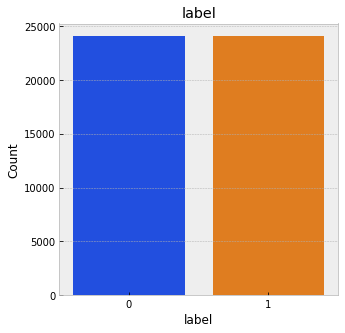

In [91]:
label = df['label'].value_counts()

plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(label.index, label.values, palette='bright')
plt.title('label')
plt.xlabel('label')
plt.style.use('bmh')
plt.ylabel('Count')
plt.tick_params(labelsize=10)
plt.show()

Now the data is balanced.

In [106]:
X = df.drop(["label"], axis = 1)
y = df["label"]

In [107]:
from sklearn.preprocessing import MinMaxScaler
for col in list(X.columns):
    scaler = MinMaxScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

Now the data is cleaned, scaled and ready to feed for machine learning model.

## Logistic Regression

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42, solver = "sag", max_iter = 15000)
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

In [109]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy = round(accuracy_score(y_test, y_pred_LR),3)
accuracy

0.77

In [110]:
conf_m = confusion_matrix(y_test, y_pred_LR)
print(conf_m)

[[3978  957]
 [1253 3422]]


## Decision Tree

In [111]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred_DT),3)
accuracy

0.746

In [112]:
conf_m = confusion_matrix(y_test, y_pred_DT)
conf_m

array([[3656, 1279],
       [1158, 3517]], dtype=int64)

## Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [124]:
y_pred_RF = RF.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred_RF),3)
accuracy

0.813

In [114]:
conf_m = confusion_matrix(y_test, y_pred_RF)
conf_m

array([[3923, 1012],
       [ 783, 3892]], dtype=int64)

In [178]:
RF.feature_importances_

array([8.37224555e-02, 1.47440770e-01, 8.65305992e-02, 5.17478176e-02,
       2.27466625e-03, 4.66410195e-02, 6.31908778e-02, 3.00571025e-02,
       5.79248020e-02, 7.88733918e-02, 4.34679480e-02, 8.97883101e-02,
       2.98304885e-02, 5.72814716e-02, 1.04063290e-03, 1.27743948e-04,
       1.68243585e-03, 4.01223829e-04, 3.19264568e-02, 7.68019496e-03,
       3.73174987e-02, 6.14949529e-03, 6.68282638e-03, 3.82197707e-02])

Text(0.5, 1.0, 'feature importance')

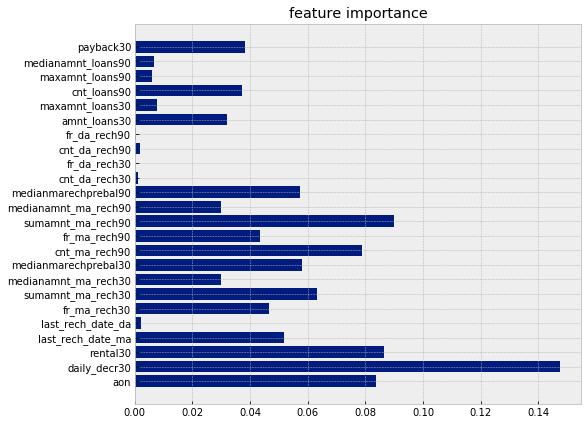

In [180]:
plt.barh(list(X.columns), RF.feature_importances_)
plt.title("feature importance")

## Naive Bayes

In [115]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred_NB = NB.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred_NB),3)
accuracy

0.722

In [116]:
conf_m = confusion_matrix(y_test, y_pred_NB)
conf_m

array([[4282,  653],
       [2018, 2657]], dtype=int64)

## Stochastic Gradient Descent

In [117]:
from sklearn.linear_model import SGDClassifier
SDG = SGDClassifier(loss="hinge", penalty="l2")
SDG.fit(X_train, y_train)
y_pred_SDG = SDG.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred_SDG),3)
accuracy

0.76

In [118]:
conf_m = confusion_matrix(y_test, y_pred_SDG)
conf_m

array([[4183,  752],
       [1554, 3121]], dtype=int64)

### Fine tuning the best model

It found that the random forest is the best model. We will fine tune the model to get better accuracy by using gridsearchCV.

In [127]:
from sklearn.model_selection import GridSearchCV
param_dict = {
    "max_depth":range(4,10,2),
    "min_samples_split":range(2,10,2),
    "min_samples_leaf":range(1,5),
    "n_estimators":range(50, 500, 50)
}
grid_RF = GridSearchCV(RF,
                      param_grid=param_dict,
                      cv = 5,
                      verbose = 1,
                      n_jobs = -1)
grid_RF.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(4, 10, 2),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(50, 500, 50)},
             verbose=1)

In [128]:
import numpy as np
cols = ["Thresholds",'TP', 'FP', 'TN','FN']
lst = []
for i in np.arange(0,1.1,0.1):
    y_pred = np.where(RF.predict_proba(X_test)[:,1]>i,1,0)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    lst.append([round(i,1),tp,fp,tn,fn])
confusion_result_RF = pd.DataFrame(lst, columns=cols)

In [129]:
def calculate_metrics(results):
    roc = pd.DataFrame(index = results['Thresholds'], columns=['recall', 'precision', 'f1', 'tpr', 'fpr'])
    
    for i in results.iterrows():
        
        t, tp, fp,tn, fn = i[1]
        
        recall = tp / (tp + fn)
        
        if tp == fp == 0:
            precision = 0
            true_positive_rate = 0
        
        else:
            precision = tp / (tp + fp)
            true_positive_rate = tp / (tp + fn)
            
        if precision == recall == 0:
            f1 = 0
        else:
            f1 = 2 * (precision * recall) / (precision + recall)
        
        
        false_positive_rate = fp / (fp + tn)
        
        roc.ix[t, 'recall'] = recall
        roc.ix[t, 'precision'] = precision
        roc.ix[t, 'f1'] = f1
        roc.ix[t, 'tpr'] = true_positive_rate
        roc.ix[t, 'fpr'] = false_positive_rate
    
    return roc

In [130]:
roc_RF = calculate_metrics(confusion_result_RF)
roc_RF.reset_index()

C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated

Thresholds    recall precision        f1       tpr        fpr
0          0.0  0.998075  0.505854  0.671415  0.998075   0.923607
1          0.1  0.983102  0.596341  0.742368  0.983102   0.630395
2          0.2  0.965989  0.646251  0.774415  0.965989   0.500912
3          0.3  0.937326  0.694123  0.797597  0.937326   0.391287
4          0.4  0.894332  0.745409  0.813108  0.894332   0.289362
5          0.5  0.832513  0.793638  0.812611  0.832513   0.205066
6          0.6  0.735615  0.844134  0.786147  0.735615   0.128673
7          0.7  0.631444  0.883039  0.736343  0.631444    0.07923
8          0.8  0.471658  0.916459  0.622793  0.471658  0.0407295
9          0.9   0.24877  0.951718  0.394438   0.24877  0.0119554
10         1.0         0         0         0         0          0

Populating the interactive namespace from numpy and matplotlib


C:\Users\Surjeet\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


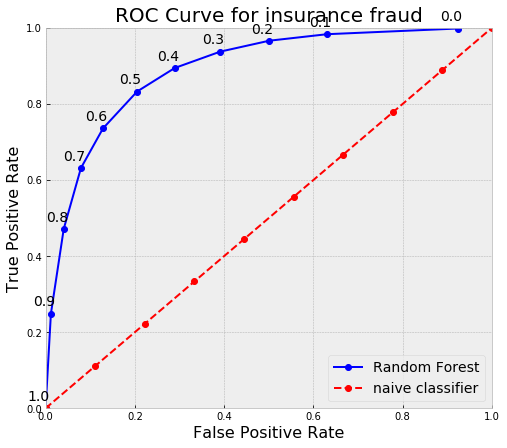

In [131]:
%pylab inline
figsize(8, 7)
plt.style.use('seaborn-dark-palette')
thresholds = [str(t) for t in confusion_result_RF['Thresholds']]
plt.plot(roc_RF['fpr'], roc_RF['tpr'], 'bo-', label = 'Random Forest');
plt.plot(list(np.linspace(0, 1, num = 10)), list(np.linspace(0, 1, num = 10)), 'ro--', label = 'naive classifier');
for x, y, s in zip(roc_RF['fpr'], roc_RF['tpr'], thresholds):
    plt.text(x - 0.04,y + 0.02, s, fontdict={'size': 14});

plt.legend(prop={'size':14})
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate', size = 16); plt.xlabel('False Positive Rate', size = 16);
plt.title('ROC Curve for insurance fraud', size = 20);

In [170]:
y_pred = np.where(RF.predict_proba(X_test)[:,1]>0.65,1,0)
pd.crosstab(y_test, y_pred)

col_0     0     1
label            
0      4419   516
1      1434  3241

In [171]:
accuracy = round(accuracy_score(y_test, y_pred),3)
accuracy

0.797

In [173]:
y_pred = np.where(RF.predict_proba(X_test)[:,1]>0.65,1,0)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("TN:",tn,"FP:",fp,"FN:",fn,"TP:",tp)
recall = round(tp/(tp+fn),2)
print("True positive rate:",recall)
print("False positive rate:",round(fp/(fp+tn),2))
precision = round(tp/(tp+fp),2)
print("Precision:",precision)
print("f-measure:",round(2*recall*precision/(recall+precision),2))

TN: 4419 FP: 516 FN: 1434 TP: 3241
True positive rate: 0.69
False positive rate: 0.1
Precision: 0.86
f-measure: 0.77


In [174]:
accuracy = round(accuracy_score(y_test, y_pred),3)
accuracy

0.797

## conclusion

Since in case of classification accuracy of the model plays an important role but only accuracy of the model is not sufficient. The parameters which need to be monitor are True Positive, True Negative, False Positive and False Negative. In our case, we have to detect the true negative case because it is important for a telecom company to avoid the sanction loan for a person which is potential defaulter. After some inspection it is found that our best model random forest detect the true negative best when threshold is set to 0.65. This model can be saved as pickle file and will be useful for the production.